In [112]:
import numpy as np
from numpy import nan
import pandas as pd
from pandas import Series, DataFrame
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib

import datetime
from datetime import datetime

import scipy
from scipy import stats

from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams
from pylab import savefig

import statsmodels.api as sm
import statsmodels.formula.api as smf

#importing all packages that I will be using
#**NOTE: DELETE ANYTHING THAT DOESN'T MAKE INTO FINAL VERSION

In [115]:
#address = '~/Desktop/code/indeedpsci.csv'
address = '//prc-cs-f9dkb42/ecozzolino$/Desktop/code/indeedpsci.csv'
indeed = pd.read_csv(address)
#read in the data from where it is saved on my computer
indeed

,Unnamed: 0,advertiser_id,assigned,date_assignment_starts,date_assignment_ends,first_revenue_date,date_created,age,assign_days,revenue
0,0,485,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-07-14,3855,138,NaN
1,1,598,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-08-02,3836,138,NaN
2,2,673,1,2017-02-01 00:00:00.000000,2017-04-28 15:36:30.000000,NaN,2006-08-17,3821,86,NaN
3,3,813,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-09-12,3795,138,NaN
4,4,1132,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-11-02,3744,138,NaN
5,5,1181,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-11-08,3738,138,NaN
6,6,1183,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-11-09,3737,138,NaN
7,7,1240,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-11-21,3725,138,NaN
8,8,1339,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-12-11,3705,138,NaN
9,9,1395,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-12-22,3694,138,NaN


In [114]:
indeed.describe()
#take a look at the columns/features/variables

#My assumptions about the data:
    #1. Date assignment starts: beginning of analysis period
        #seems to be almost uniformly 2/1/2017
    #2. Date assignment ends: end of analysis period
        #varies more, with latest date being 6/19/2017
        #So together, it looks like our time period of analysis is 4 mos in 2017
    #3. Date created: earliest date that advertiser is in the system
        #These are typically years before the period of analysis,
        #though in some cases, they enter the system AFTER the analysis period
        #has begun.
    #4. Assign_days should be the difference between date assingment starts
        #and date assignment ends, if a lead is assigned
            #Alternatively, it could be the difference between the date assignment
            #starts and the first_revenue date, if first_revenue date occurs during
            #the analysis period - effectively truncating the analysis for this 
            #lead, whom we observe until they pay, or until the analysis period ends
        #If unassigned, assign_days should be 0.
    #5. Age should be the difference between date_created and date_assignment begins
        #measuring how long this lead has been around before the period of analysis.
    #6. First revenue date should measure the first time that a lead paid money 
        #to Indeed. In many cases, this first_revenue_date happens before our period
        #of observation begins. This could signify that a lead is good, because they 
        #have paid out in the past, and may have caused them to get assigned at a higher
        #priority than leads without an entry for first revenue date.
        #If first revenue date is missing, I'm assuming it means that this lead has never 
        #brought in revenue to Indeed. 
    #7. Revenue is the amount of money that a lead brought in during the period of analysis.
        #If revenue is missing, I'm assuming that this lead did not bring in any money
        #during the period of analysis.
    

,Unnamed: 0,advertiser_id,assigned,age,assign_days,revenue
count,77891.000000,7.789100e+04,77891.000000,77891.000000,77891.000000,3.340000e+03
mean,38945.000000,7.924271e+06,0.476037,309.958532,120.482546,4.865177e+07
std,22485.339246,3.918985e+06,0.499429,488.801166,39.527908,1.736891e+08
min,0.000000,4.850000e+02,0.000000,-27.000000,-2.000000,1.200000e+04
25%,19472.500000,4.317428e+06,0.000000,0.000000,136.000000,6.398444e+06
50%,38945.000000,1.078788e+07,0.000000,0.000000,137.000000,1.514775e+07
75%,58417.500000,1.080747e+07,1.000000,523.000000,138.000000,3.704959e+07
max,77890.000000,1.119963e+07,1.000000,3855.000000,138.000000,6.533791e+09


In [120]:
indeed.date_assignment_starts < indeed.date_assignment_ends
sum(indeed.date_assignment_starts < indeed.date_assignment_ends)
#this is true in all but one case (77,889/77,890)

77889

In [132]:
pd.to_datetime(indeed.date_assignment_starts)

0       2017-02-01
1       2017-02-01
2       2017-02-01
3       2017-02-01
4       2017-02-01
5       2017-02-01
6       2017-02-01
7       2017-02-01
8       2017-02-01
9       2017-02-01
10      2017-02-01
11      2017-02-01
12      2017-02-01
13      2017-02-01
14      2017-02-01
15      2017-02-01
16      2017-02-01
17      2017-02-01
18      2017-02-01
19      2017-02-01
20      2017-02-01
21      2017-02-01
22      2017-02-02
23      2017-02-01
24      2017-02-01
25      2017-02-01
26      2017-02-01
27      2017-02-01
28      2017-02-01
29      2017-02-01
           ...    
77861   2017-02-01
77862   2017-02-01
77863   2017-02-01
77864   2017-02-01
77865   2017-02-01
77866   2017-02-01
77867   2017-02-01
77868   2017-02-01
77869   2017-02-01
77870   2017-02-01
77871   2017-02-01
77872   2017-02-01
77873   2017-02-01
77874   2017-02-01
77875   2017-02-01
77876   2017-02-01
77877   2017-02-01
77878   2017-02-01
77879   2017-02-01
77880   2017-02-01
77881   2017-02-01
77882   2017

In [133]:
pd.to_datetime(indeed.date_assignment_ends)

0       2017-06-19 12:12:37.888680
1       2017-06-19 12:12:37.888680
2       2017-04-28 15:36:30.000000
3       2017-06-19 12:12:37.888680
4       2017-06-19 12:12:37.888680
5       2017-06-19 12:12:37.888680
6       2017-06-19 12:12:37.888680
7       2017-06-19 12:12:37.888680
8       2017-06-19 12:12:37.888680
9       2017-06-19 12:12:37.888680
10      2017-06-19 12:12:37.888680
11      2017-06-19 12:12:37.888680
12      2017-06-19 12:12:37.888680
13      2017-06-19 12:12:37.888680
14      2017-06-19 12:12:37.888680
15      2017-06-19 12:12:37.888680
16      2017-06-19 12:12:37.888680
17      2017-06-19 12:12:37.888680
18      2017-06-19 12:12:37.888680
19      2017-06-19 12:12:37.888680
20      2017-06-19 12:12:37.888680
21      2017-06-19 12:12:37.888680
22      2017-06-19 12:12:37.888680
23      2017-06-19 12:12:37.888680
24      2017-06-19 12:12:37.888680
25      2017-06-19 12:12:37.888680
26      2017-06-19 12:12:37.888680
27      2017-06-19 12:12:37.888680
28      2017-06-19 1

In [136]:
pd.to_datetime(indeed.date_created)

0       2006-07-14
1       2006-08-02
2       2006-08-17
3       2006-09-12
4       2006-11-02
5       2006-11-08
6       2006-11-09
7       2006-11-21
8       2006-12-11
9       2006-12-22
10      2007-03-05
11      2007-03-05
12      2007-03-16
13      2007-05-25
14      2007-06-13
15      2007-06-18
16      2007-08-15
17      2007-10-02
18      2007-10-11
19      2007-11-16
20      2007-11-16
21      2007-12-12
22      2008-01-23
23      2008-03-17
24      2008-03-18
25      2008-03-28
26      2008-05-23
27      2008-05-28
28      2008-05-29
29      2008-06-04
           ...    
77861   2017-02-16
77862   2017-02-16
77863   2017-02-16
77864   2017-02-16
77865   2017-02-16
77866   2017-02-17
77867   2017-02-17
77868   2017-02-18
77869   2017-02-18
77870   2017-02-19
77871   2017-02-19
77872   2017-02-20
77873   2017-02-20
77874   2017-02-21
77875   2017-02-21
77876   2017-02-21
77877   2017-02-21
77878   2017-02-21
77879   2017-02-22
77880   2017-02-22
77881   2017-02-22
77882   2017

In [137]:
pd.to_datetime(indeed.first_revenue_date)

0              NaT
1              NaT
2              NaT
3              NaT
4              NaT
5              NaT
6              NaT
7              NaT
8              NaT
9              NaT
10      2007-03-05
11             NaT
12      2007-06-18
13             NaT
14             NaT
15             NaT
16             NaT
17             NaT
18             NaT
19             NaT
20      2007-11-16
21             NaT
22             NaT
23      2008-03-17
24             NaT
25      2008-04-01
26             NaT
27             NaT
28             NaT
29             NaT
           ...    
77861          NaT
77862          NaT
77863          NaT
77864          NaT
77865          NaT
77866          NaT
77867          NaT
77868          NaT
77869          NaT
77870          NaT
77871          NaT
77872          NaT
77873          NaT
77874          NaT
77875          NaT
77876          NaT
77877          NaT
77878   2017-02-21
77879   2017-02-27
77880          NaT
77881          NaT
77882       

In [138]:
#age2 = indeed.date_created - indeed.date_assignment_starts
#Okay, not sure how to test these assumptions. I'll come back to it. 
#https://stackoverflow.com/questions/6749294/understanding-timedelta
#https://docs.python.org/2/library/datetime.html
#https://pandas.pydata.org/pandas-docs/stable/indexing.html

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [68]:
print(indeed.revenue)

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
5                NaN
6                NaN
7                NaN
8                NaN
9                NaN
10               NaN
11               NaN
12               NaN
13               NaN
14               NaN
15               NaN
16               NaN
17               NaN
18               NaN
19               NaN
20       707100000.0
21               NaN
22               NaN
23               NaN
24               NaN
25               NaN
26               NaN
27               NaN
28               NaN
29               NaN
            ...     
77861            NaN
77862            NaN
77863            NaN
77864            NaN
77865            NaN
77866            NaN
77867            NaN
77868            NaN
77869            NaN
77870            NaN
77871            NaN
77872            NaN
77873            NaN
77874            NaN
77875            NaN
77876            NaN
77877        

In [69]:
indeed.duplicated('advertiser_id')
ad_dups = indeed.advertiser_id[indeed.advertiser_id.duplicated()].values
ad_dups
#there are no duplicate entries for advertiser_id
#so, there are 77,890 leads represented in this dataset

array([], dtype=int64)

In [70]:
indeed['revenue2']=indeed['revenue'].fillna(0)
#I assume that if the value for 'revenue' is missing, it means
#that there was no revenue during the period of observation. 
#Create a new revenue column, with NaN replaced with 0s
indeed.describe()

,Unnamed: 0,advertiser_id,assigned,age,assign_days,revenue,revenue2
count,77891.000000,7.789100e+04,77891.000000,77891.000000,77891.000000,3.340000e+03,7.789100e+04
mean,38945.000000,7.924271e+06,0.476037,309.958532,120.482546,4.865177e+07,2.086209e+06
std,22485.339246,3.918985e+06,0.499429,488.801166,39.527908,1.736891e+08,3.728792e+07
min,0.000000,4.850000e+02,0.000000,-27.000000,-2.000000,1.200000e+04,0.000000e+00
25%,19472.500000,4.317428e+06,0.000000,0.000000,136.000000,6.398444e+06,0.000000e+00
50%,38945.000000,1.078788e+07,0.000000,0.000000,137.000000,1.514775e+07,0.000000e+00
75%,58417.500000,1.080747e+07,1.000000,523.000000,138.000000,3.704959e+07,0.000000e+00
max,77890.000000,1.119963e+07,1.000000,3855.000000,138.000000,6.533791e+09,6.533791e+09


In [71]:
indeed.groupby('assigned').describe()
#40,812 are unassigned
#37,079 are assigned

Unnamed: 0                                                       \
              count          mean           std   min       25%      50%   
assigned                                                                   
0           40812.0  55228.617318  13686.097612  33.0  44296.75  55528.5   
1           37079.0  21021.998031  15582.937167   0.0   9409.50  18882.0   

                            advertiser_id                    ...       \
               75%      max         count          mean      ...        
assigned                                                     ...        
0         66938.25  77824.0       40812.0  1.068360e+07      ...        
1         28417.50  77890.0       37079.0  4.887142e+06      ...        

             revenue               revenue2                                   \
                 75%           max    count          mean           std  min   
assigned                                                                       
0         24672039.5  6.533791e+09  40812.0  1.039001e+06  3.322616e+07  0.0   
1         58548372.0  2.500000e+09  37079.0  3.238846e+06  4.126909e+07  0.0   

                                       
          25%  50%  75%           max  
assigned                               
0         0.0  0.0  0.0  6.533791e+09  
1         0.0  0.0  0.0  2.500000e+09  

[2 rows x 48 columns]

In [72]:
indeed.groupby('assigned').mean()
#Comparison of the two groups:
#age of assigned leads is older, number of assign days is smaller, on averge
#revenue is higher among the assigned leads

,Unnamed: 0,advertiser_id,age,assign_days,revenue,revenue2
assigned,,,,,,
0,55228.617318,1.068360e+07,11.907919,124.014971,2.388942e+07,1.039001e+06
1,21021.998031,4.887142e+06,638.015966,116.594487,7.673686e+07,3.238846e+06


In [73]:
rcParams['figure.figsize'] = 5, 4 #this is the size of the plot
sb.set_style('whitegrid') #this is the style: white grid

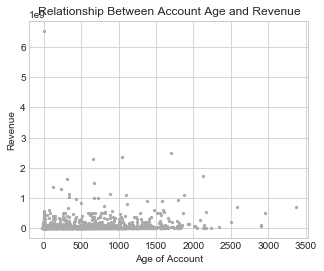

In [74]:
indeed.plot(kind='scatter', x='age', y='revenue', c=['darkgray'], s=5)
plt.xlabel('Age of Account')
plt.ylabel('Revenue') 
plt.title('Relationship Between Account Age and Revenue')
plt.show()
#need to fix the sizing - find from DSLynda
#so many 0's that it's hard to see the relationship

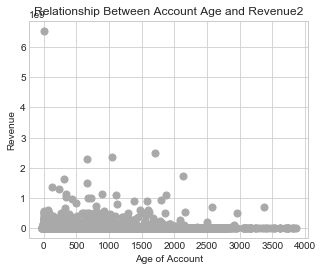

In [75]:
indeed.plot(kind='scatter', x='age', y='revenue2', c=['darkgray'], s=50)
plt.xlabel('Age of Account')
plt.ylabel('Revenue') 
plt.title('Relationship Between Account Age and Revenue2')
plt.show()
#need to fix the sizing - find from DSLynda
#so many 0's that it's hard to see the relationship

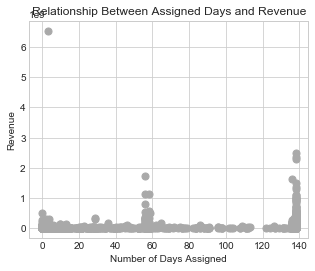

In [76]:
indeed.plot(kind='scatter', x='assign_days', y='revenue', c=['darkgray'], s=50)
plt.xlabel('Number of Days Assigned')
plt.ylabel('Revenue') 
plt.title('Relationship Between Assigned Days and Revenue')
plt.show()
#biggest revenue comes from 0 days assigned
#then spikes in revenue around 60 days, and
#again at the end of the period of observation

In [77]:
pearsonr_coefficient, p_value = pearsonr(indeed.age, indeed.revenue2)
print('PearsonR Correlation Coefficient %0.3f' % (pearsonr_coefficient))
#significant correlation b/w age and revenue

table = pd.crosstab(indeed.assigned, indeed.revenue)
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))
#Revenue of Assigned and unassigned groups significantly different

PearsonR Correlation Coefficient 0.027
Chi-square Statistic 3131.347 p_value 0.017


In [78]:
indeed['anyfirstrev']=indeed['first_revenue_date'].fillna(0)
indeed['anyfirstrev']
#create indicator for whether an advertising lead has ever given revenue
#replace NaN with 0s - assuming no observations means there hasn't been
#a first revenue date for this adveriser

0                 0
1                 0
2                 0
3                 0
4                 0
5                 0
6                 0
7                 0
8                 0
9                 0
10       2007-03-05
11                0
12       2007-06-18
13                0
14                0
15                0
16                0
17                0
18                0
19                0
20       2007-11-16
21                0
22                0
23       2008-03-17
24                0
25       2008-04-01
26                0
27                0
28                0
29                0
            ...    
77861             0
77862             0
77863             0
77864             0
77865             0
77866             0
77867             0
77868             0
77869             0
77870             0
77871             0
77872             0
77873             0
77874             0
77875             0
77876             0
77877             0
77878    2017-02-21
77879    2017-02-27


In [90]:
indeed['anyfirstrev'] = np.where(indeed['anyfirstrev']!=0, 1, 0)
#complete indicator variable by filling in the dates with 1s
#(indicating yes there has been a first revenue date)

In [92]:
indeed['anyrev'] = np.where(indeed['revenue2']!=0, 1, 0)
#create an indicator variable for whether or not there's any revenue by a given advertising lead

In [93]:
indeed

,Unnamed: 0,advertiser_id,assigned,date_assignment_starts,date_assignment_ends,first_revenue_date,date_created,age,assign_days,revenue,revenue2,anyfirstrev,anyrev
0,0,485,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-07-14,3855,138,NaN,0.0,0,0
1,1,598,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-08-02,3836,138,NaN,0.0,0,0
2,2,673,1,2017-02-01 00:00:00.000000,2017-04-28 15:36:30.000000,NaN,2006-08-17,3821,86,NaN,0.0,0,0
3,3,813,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-09-12,3795,138,NaN,0.0,0,0
4,4,1132,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-11-02,3744,138,NaN,0.0,0,0
5,5,1181,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-11-08,3738,138,NaN,0.0,0,0
6,6,1183,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-11-09,3737,138,NaN,0.0,0,0
7,7,1240,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-11-21,3725,138,NaN,0.0,0,0
8,8,1339,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-12-11,3705,138,NaN,0.0,0,0
9,9,1395,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-12-22,3694,138,NaN,0.0,0,0


In [94]:
indeed_trim = indeed[['assigned', 'age', 'assign_days', 'revenue2', 'anyrev', 'anyfirstrev']]
#create dataframe with only the numerical, nonmissing values

In [95]:
indeed_trim

,assigned,age,assign_days,revenue2,anyrev,anyfirstrev
0,1,3855,138,0.0,0,0
1,1,3836,138,0.0,0,0
2,1,3821,86,0.0,0,0
3,1,3795,138,0.0,0,0
4,1,3744,138,0.0,0,0
5,1,3738,138,0.0,0,0
6,1,3737,138,0.0,0,0
7,1,3725,138,0.0,0,0
8,1,3705,138,0.0,0,0
9,1,3694,138,0.0,0,0


In [96]:
indeed_trim.isnull().any()
#making sure we have no missing values in the trim dataset

assigned       False
age            False
assign_days    False
revenue2       False
anyrev         False
anyfirstrev    False
dtype: bool

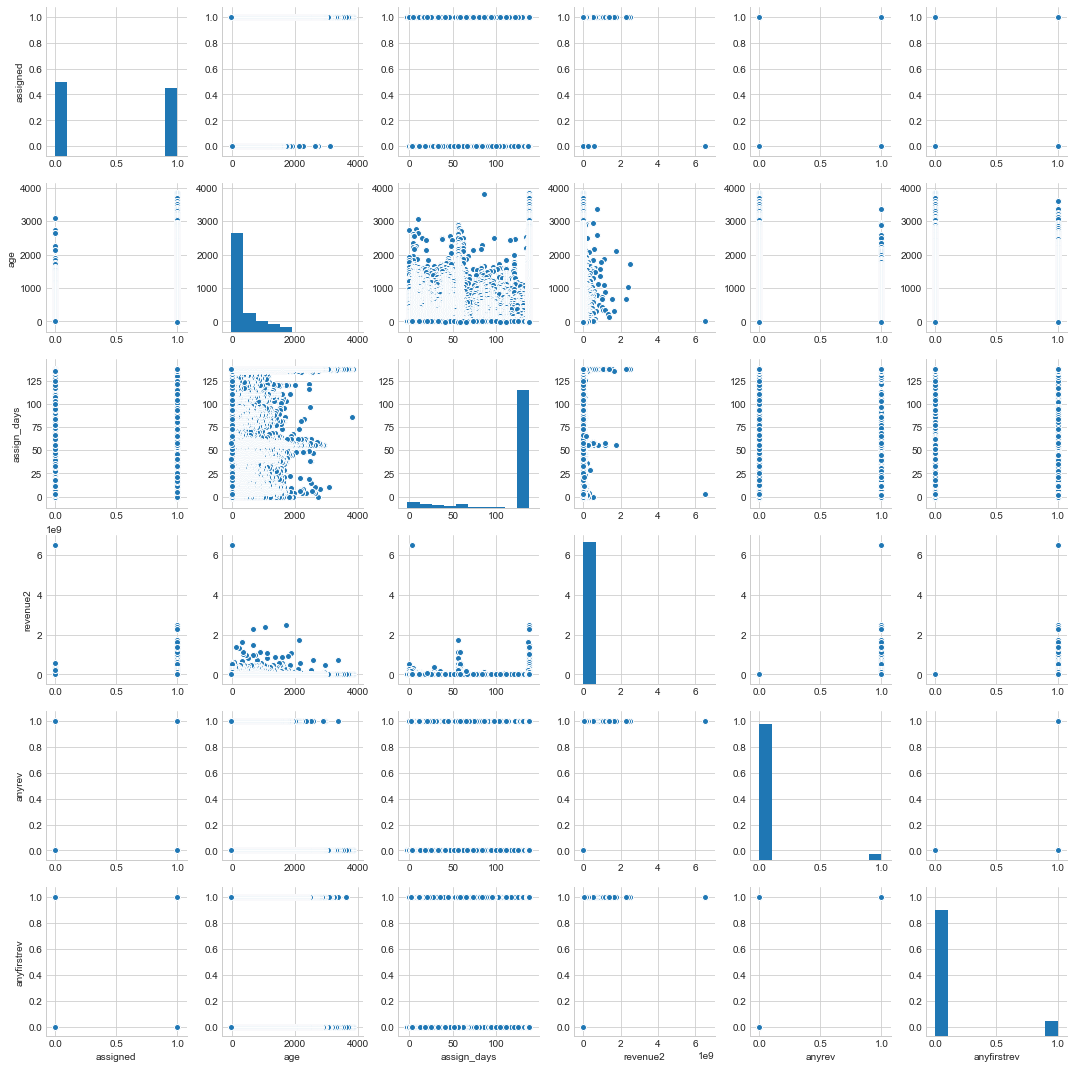

In [97]:
X = indeed_trim
sb.pairplot(X)
plt.show()

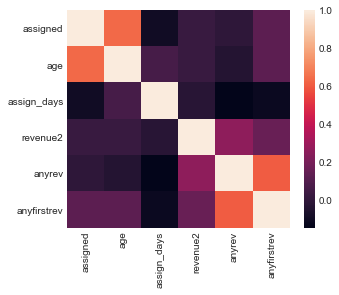

In [98]:
corr = X.corr()
corr
sb.heatmap(corr,xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()
#strongest correlation appears to be between assigned and age

In [99]:
y = indeed_trim.revenue2
X = indeed_trim.drop(['revenue2', 'anyrev'], axis=1)

In [100]:
results = sm.OLS(y, X).fit()
results.summary()
#assigned is only marginally significantly predictive of revenue
#meaning: assignment marginally increases revenue
#age does not predict revenue
#assign_days negatively predicts revenue
#Meaning: The longer a lead is assigned, the lower the revenue
#anyfirstrev positively predicts revenue
#meaning: lead having ever given revenue positively predicts revenue within observation period
#R2 is quite low (only 0.03% of variation is explained in this model)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               revenue2   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     579.8
Date:                Fri, 29 Dec 2017   Prob (F-statistic):               0.00
Time:                        15:54:40   Log-Likelihood:            -1.4675e+06
No. Observations:               77891   AIC:                         2.935e+06
Df Residuals:                   77887   BIC:                         2.935e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
assigned     5.784e+05   3.27e+05      1.770      0.077   -6.22e+04    1.22e+06
age           158.2291    352.812      0.448      0.654    -533.281     849.739
assign_days -2715.4611   1357.946     -2.000      0.046   -5377.027     -53.895
anyfirstrev   1.91e+07   4.25e+05     44.893      0.000    1.83e+07    1.99e+07
==============================================================================
Omnibus:                   300583.604   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     597686978124.814
Skew:                          91.177   Prob(JB):                         0.00
Kurtosis:                   13572.369   Cond. No.                     1.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
y = indeed_trim.anyrev
X = indeed_trim.drop(['revenue2', 'anyrev'], axis=1)

In [104]:
logit = sm.Logit(y, X)
result = logit.fit()
print(result.summary())
#http://blog.yhat.com/posts/logistic-regression-python-rodeo.html

Optimization terminated successfully.
         Current function value: 0.109740
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 anyrev   No. Observations:                77891
Model:                          Logit   Df Residuals:                    77887
Method:                           MLE   Df Model:                            3
Date:                Fri, 29 Dec 2017   Pseudo R-squ.:                  0.3800
Time:                        15:57:32   Log-Likelihood:                -8547.8
converged:                       True   LL-Null:                       -13786.
                                        LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
assigned       -1.9489      0.049    -39.465      0.000      -2.046      -1.852
age            -0.0007    

In [106]:
print(np.exp(result.params))
#R2 is 38% - data are better at explaining binary outcome than amount of revenue
#assignment actually reduces the odds of any revenue by 14%
#any first revenue increases the odds of subsequent revenue astronomically (by 120x)
#age and assign_days both reduce the odds of any revenue, but by small magnitudes (1% and 3% respectively)

assigned         0.142425
age              0.999340
assign_days      0.967458
anyfirstrev    121.280155
dtype: float64


In [108]:
#now, could this be because of some weird values that I was seeing? negative values on age and assign days?
#NOT SURE how to do this.
indeed_trim2 = indeed_trim
indeed_trim2

,assigned,age,assign_days,revenue2,anyrev,anyfirstrev
0,1,3855,138,0.0,0,0
1,1,3836,138,0.0,0,0
2,1,3821,86,0.0,0,0
3,1,3795,138,0.0,0,0
4,1,3744,138,0.0,0,0
5,1,3738,138,0.0,0,0
6,1,3737,138,0.0,0,0
7,1,3725,138,0.0,0,0
8,1,3705,138,0.0,0,0
9,1,3694,138,0.0,0,0


In [ ]:
#pd.to_numeric(indeed['anyfirstrev'], errors='coerce')
#indeed['anyfirstrev2']=indeed['anyfirstrev'].fillna(1)
#indeed

In [ ]:
#if pd.isnull(indeed.first_revenue_date.bool==True):
 #   indeed.anyfirstrev=0
#else:
 #   indeed.anyfirstrev=1
#does not append to indeed

In [ ]:
#if pd.isnull(indeed.first_revenue_date.bool==True):
 #   indeed['anyfirstrev']=0
#else:
 #   indeed['anyfirstrev']=1
#all rows are 1